**Taller 3 - Santiago Restrepo Olarte**

A partir del archivo de precios del Taller 2 realizar el preprocesamiento del conjunto de datos obtenido considerando:

1.	Justificación de la necesidad de redefinir variables y redefinición si es necesaria
2.	Justificación de la necesidad de categorizar variables y categorización si es necesaria
3.	Identificación de datos faltantes, justificación y uso de la estrategia de tratamiento de datos faltantes
4.	Identificación de datos duplicados, justificación y uso de la estrategia de tratamiento de datos duplicados
5.	Identificación de datos outliers, justificación y uso de la estrategia de tratamiento de datos outliers
6.	Justificación de la necesidad de normalizar o estandarizar variables
7.	Mínimo 5 preguntas que quiera resolver a partir del filtrado de columnas o filas.
8.	Mínimo 5 gráficos que sean de interés para entender el problema.

Deberá entregar un notebook y un documento con las respuesta a cada uno de los items 1  a 8. Estos documentos los debe subir a Ingenia y a su GitHub.


# Lectura de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs'

df=pd.read_csv(url)

df.head(5)

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493


In [3]:
df['producto'].unique()

array(['Arveja verde en vaina', 'Cebolla cabezona blanca',
       'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde*', 'Habichuela',
       'Lechuga batavia', 'Pepino cohombro', 'Pimentón', 'Remolacha',
       'Tomate*', 'Zanahoria', 'Aguacate*', 'Banano*', 'Coco',
       'Granadilla', 'Guayaba*', 'Limón común', 'Limón Tahití', 'Lulo',
       'Mandarina*', 'Mango tommy', 'Manzana royal gala', 'Maracuyá',
       'Mora de Castilla', 'Naranja*', 'Papaya maradol', 'Piña *',
       'Tomate de árbol', 'Arracacha*', 'Papa negra*', 'Papa criolla',
       'Plátano guineo', 'Plátano hartón verde', 'Yuca*', 'Aguacate *',
       'Papa  criolla'], dtype=object)

In [4]:
df['ciudad'].unique()

array(['armenia', 'bogotá', 'bucaramanga', 'cali', 'cúcuta', 'ibagué',
       'medellín', 'neiva', 'pereira', 'santa', 'tunja', 'barranquilla',
       'cartagena', 'montería', 'pasto', 'popayán', 'sincelejo',
       'valledupar', 'villavicencio', 'manizales'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      9240 non-null   object 
 1   ciudad        9240 non-null   object 
 2   precio        9240 non-null   object 
 3   variabilidad  9240 non-null   object 
 4   fecha         9240 non-null   object 
 5   LATITUD       7105 non-null   float64
 6   LONGITUD      7105 non-null   float64
dtypes: float64(2), object(5)
memory usage: 505.4+ KB


# Redefinición de variables

Se cambia el tipo de dato de las columna 'precio' y 'variabilidad' a entero (int) y decimal (float) respectivamente.

*se realiza más adelante

# Datos faltantes

In [6]:
# Se reemplazan los faltantes 'n.d.' por datos nulos de numpy 'np.nan'

df = df.replace('n.d.', np.nan)
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,NaN,NaN,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
9238,Yuca*,santa,NaN,NaN,29ago2023,NaN,NaN


In [7]:
df['producto'].unique()

array(['Arveja verde en vaina', 'Cebolla cabezona blanca',
       'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde*', 'Habichuela',
       'Lechuga batavia', 'Pepino cohombro', 'Pimentón', 'Remolacha',
       'Tomate*', 'Zanahoria', 'Aguacate*', 'Banano*', 'Coco',
       'Granadilla', 'Guayaba*', 'Limón común', 'Limón Tahití', 'Lulo',
       'Mandarina*', 'Mango tommy', 'Manzana royal gala', 'Maracuyá',
       'Mora de Castilla', 'Naranja*', 'Papaya maradol', 'Piña *',
       'Tomate de árbol', 'Arracacha*', 'Papa negra*', 'Papa criolla',
       'Plátano guineo', 'Plátano hartón verde', 'Yuca*', 'Aguacate *',
       'Papa  criolla'], dtype=object)

In [8]:
# Muestra las variables que tienen datos faltantes

df.isnull().any()

producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [9]:
# Imprime el número de valores faltantes de cada columna

print(df.isnull().sum())

producto           0
ciudad             0
precio          2236
variabilidad    2384
fecha              0
LATITUD         2135
LONGITUD        2135
dtype: int64


In [10]:
df_bogota=df[(df['ciudad']=='bogotá') & (df['LATITUD'] !=np.nan)]
df_bogota

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
14,Cebolla cabezona blanca,bogotá,1763,0.01,01ago2023,NaN,NaN
26,Cebolla junca,bogotá,3924,0.19,01ago2023,NaN,NaN
38,Chócolo mazorca,bogotá,1642,0.15,01ago2023,NaN,NaN
50,Fríjol verde*,bogotá,3825,-0.09,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
9182,Papa negra*,bogotá,1538,0,29ago2023,NaN,NaN
9194,Papa criolla,bogotá,3944,0.01,29ago2023,NaN,NaN
9206,Plátano guineo,bogotá,NaN,NaN,29ago2023,NaN,NaN
9218,Plátano hartón verde,bogotá,2625,-0.05,29ago2023,NaN,NaN


In [11]:
df_bogota['LATITUD'].isnull().sum()

665

In [12]:
df_fal = df[df['LATITUD'].isna()]
df_fal

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
5,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
10,Arveja verde en vaina,santa,NaN,NaN,01ago2023,NaN,NaN
14,Cebolla cabezona blanca,bogotá,1763,0.01,01ago2023,NaN,NaN
17,Cebolla cabezona blanca,cúcuta,1958,-0.15,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
9221,Plátano hartón verde,cúcuta,2758,0,29ago2023,NaN,NaN
9226,Plátano hartón verde,santa,NaN,NaN,29ago2023,NaN,NaN
9230,Yuca*,bogotá,NaN,NaN,29ago2023,NaN,NaN
9233,Yuca*,cúcuta,2600,0.03,29ago2023,NaN,NaN


In [13]:
df_fal['LONGITUD'].isnull().sum(),df_fal['LATITUD'].isnull().sum()

(2135, 2135)

In [14]:
df_fal['ciudad'].unique()

array(['bogotá', 'cúcuta', 'santa', 'cartagena'], dtype=object)

Gracias a la exploración del dataframe nos damos cuenta que las ciudades Bogotá, Cúcuta, Santa Marta y Cartagena tienen todos sus datos faltantes en sus columnas 'LONGITUD' y 'LATITUD'.

Por ende, se decide imputar dichos datos con la longitd y latitud correspondiente a cada ciudad.

In [15]:
# Coordenadas de las ciudades
coordenadas = {
    'bogotá': {'LONGITUD': -74.08175, 'LATITUD': 4.60971},
    'cúcuta': {'LONGITUD': -72.507820, 'LATITUD': 7.893910},
    'santa': {'LONGITUD': -74.19904, 'LATITUD': 11.24079},
    'cartagena': {'LONGITUD': -75.51444, 'LATITUD': 10.39972}
}

# Ciclo para iterar sobre el df y reemplazar el valor de la longitud y latitud
for index, row in df.iterrows():
    ciudad = row['ciudad']
    if ciudad in coordenadas:
        df.at[index, 'LONGITUD'] = coordenadas[ciudad]['LONGITUD']
        df.at[index, 'LATITUD'] = coordenadas[ciudad]['LATITUD']

df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.609710,-74.081750
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,NaN,NaN,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
9238,Yuca*,santa,NaN,NaN,29ago2023,11.240790,-74.199040


In [16]:
df['LATITUD'].isnull().sum(),df['LONGITUD'].isnull().sum()

(0, 0)

In [17]:
df_fal_precio = df[df['precio'].isna()]
df_fal_precio

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
10,Arveja verde en vaina,santa,NaN,NaN,01ago2023,11.240790,-74.199040
20,Cebolla cabezona blanca,neiva,NaN,NaN,01ago2023,2.993360,-75.272362
30,Cebolla junca,ibagué,NaN,NaN,01ago2023,4.451921,-75.252591
34,Cebolla junca,santa,NaN,NaN,01ago2023,11.240790,-74.199040
45,Chócolo mazorca,pereira,NaN,NaN,01ago2023,4.803663,-75.795791
...,...,...,...,...,...,...,...
9232,Yuca*,cali,NaN,NaN,29ago2023,3.399044,-76.576493
9234,Yuca*,ibagué,NaN,NaN,29ago2023,4.451921,-75.252591
9236,Yuca*,neiva,NaN,NaN,29ago2023,2.993360,-75.272362
9238,Yuca*,santa,NaN,NaN,29ago2023,11.240790,-74.199040


In [ ]:
df_fal_precio['producto'].unique()

array(['Arveja verde en vaina', 'Cebolla cabezona blanca',
       'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde*',
       'Lechuga batavia', 'Pimentón', 'Remolacha', 'Tomate*', 'Zanahoria',
       'Aguacate*', 'Coco', 'Granadilla', 'Guayaba*', 'Limón común',
       'Limón Tahití', 'Lulo', 'Mandarina*', 'Mango tommy',
       'Manzana royal gala', 'Maracuyá', 'Naranja*', 'Papaya maradol',
       'Piña *', 'Arracacha*', 'Papa negra*', 'Papa criolla',
       'Plátano guineo', 'Plátano hartón verde', 'Yuca*', 'Aguacate *',
       'Banano*', 'Tomate de árbol', 'Habichuela', 'Pepino cohombro',
       'Mora de Castilla', 'Papa  criolla'], dtype=object)

En el caso de la columna precio (contiene 2236 observaciones faltantes) se eliminan dado que para esos productos no se obtuvo registro en ciertos días. Al eliminar dichas filas también desaparecen la mayoría de observaciones que tienen datos faltantes en la columna 'variabilidad'.

In [18]:
df = df.dropna(subset=['precio'])

In [19]:
df['precio'].isnull().sum()

0

In [20]:
df.isnull().sum()

producto          0
ciudad            0
precio            0
variabilidad    148
fecha             0
LATITUD           0
LONGITUD          0
dtype: int64

In [21]:
# Redefinicion de la variable precio (object a int)
df['precio'] = df['precio'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7004 entries, 0 to 9237
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      7004 non-null   object 
 1   ciudad        7004 non-null   object 
 2   precio        7004 non-null   int64  
 3   variabilidad  6856 non-null   object 
 4   fecha         7004 non-null   object 
 5   LATITUD       7004 non-null   float64
 6   LONGITUD      7004 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 437.8+ KB


<ipython-input-21-b8e018f425f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio'] = df['precio'].astype('int')


In [ ]:
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200.0,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.609710,-74.081750
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9229,Yuca*,armenia,1640.0,0,29ago2023,4.499501,-75.724900
9231,Yuca*,bucaramanga,2690.0,0.05,29ago2023,7.155834,-73.111570
9233,Yuca*,cúcuta,2600.0,0.03,29ago2023,7.893910,-72.507820
9235,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031


Para las 148 observaciones que quedan con datos faltantes en 'variabilidad' se decide imputar con el valor de 0

In [22]:
df['variabilidad'].isnull().sum()

148

In [23]:
df_fal_var=df[df['variabilidad'].isna()]
df_fal_var

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
7,Arveja verde en vaina,medellín,5950,NaN,01ago2023,6.257590,-75.611031
9,Arveja verde en vaina,pereira,7200,NaN,01ago2023,4.803663,-75.795791
43,Chócolo mazorca,medellín,1500,NaN,01ago2023,6.257590,-75.611031
166,Banano*,santa,1412,NaN,01ago2023,11.240790,-74.199040
286,Maracuyá,santa,4167,NaN,01ago2023,11.240790,-74.199040
...,...,...,...,...,...,...,...
8890,Habichuela,santa,3450,NaN,29ago2023,11.240790,-74.199040
8894,Lechuga batavia,bogotá,900,NaN,29ago2023,4.609710,-74.081750
8914,Pepino cohombro,santa,1500,NaN,29ago2023,11.240790,-74.199040
9080,Mango tommy,neiva,7600,NaN,29ago2023,2.993360,-75.272362


In [26]:
# Imputar datos faltantes de 'variabilidad' por 0

df['variabilidad'] = df['variabilidad'].fillna(0)
df

<ipython-input-26-f4d15fa51853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variabilidad'] = df['variabilidad'].fillna(0)


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.609710,-74.081750
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9229,Yuca*,armenia,1640,0.00,29ago2023,4.499501,-75.724900
9231,Yuca*,bucaramanga,2690,0.05,29ago2023,7.155834,-73.111570
9233,Yuca*,cúcuta,2600,0.03,29ago2023,7.893910,-72.507820
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031


In [27]:
# Redefinicion de tipo de dato en 'variabilidad' (object a float)

df['variabilidad'] = df['variabilidad'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7004 entries, 0 to 9237
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      7004 non-null   object 
 1   ciudad        7004 non-null   object 
 2   precio        7004 non-null   int64  
 3   variabilidad  7004 non-null   float64
 4   fecha         7004 non-null   object 
 5   LATITUD       7004 non-null   float64
 6   LONGITUD      7004 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 437.8+ KB


<ipython-input-27-7bd8f4bdeb1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variabilidad'] = df['variabilidad'].astype('float')


In [29]:
df.isnull().sum()

producto        0
ciudad          0
precio          0
variabilidad    0
fecha           0
LATITUD         0
LONGITUD        0
dtype: int64

# Datos duplicados

Una vez se eliminan las observaciones con datos faltantes en 'precio' y 'variabilidad' queda 1 dato duplicado (que se decide eliminar) pero inicialmente existían 13 observaciones duplicadas.

In [31]:
# Imprimir las filas duplicadas, mostrando cada columna

df[df.duplicated()]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
1152,Mandarina*,pereira,4000,0.0,03ago2023,4.803663,-75.795791


In [33]:
# Eliminar dato dupliacdo

df=df.drop_duplicates()
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.609710,-74.081750
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9229,Yuca*,armenia,1640,0.00,29ago2023,4.499501,-75.724900
9231,Yuca*,bucaramanga,2690,0.05,29ago2023,7.155834,-73.111570
9233,Yuca*,cúcuta,2600,0.03,29ago2023,7.893910,-72.507820
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031


# Outliers

In [34]:
# Redefinicion de tipo de dato en 'precio' (object a int)

df['precio'] = df['precio'].astype('int')

In [36]:
df['precio'].describe(), df['variabilidad'].describe()

(count     7003.000000
 mean      3155.019849
 std       1932.068856
 min        339.000000
 25%       1700.000000
 50%       2775.000000
 75%       3942.000000
 max      10000.000000
 Name: precio, dtype: float64,
 count    7003.000000
 mean        0.002519
 std         0.092890
 min        -0.460000
 25%        -0.030000
 50%         0.000000
 75%         0.020000
 max         1.060000
 Name: variabilidad, dtype: float64)

<Axes: xlabel='precio', ylabel='Count'>

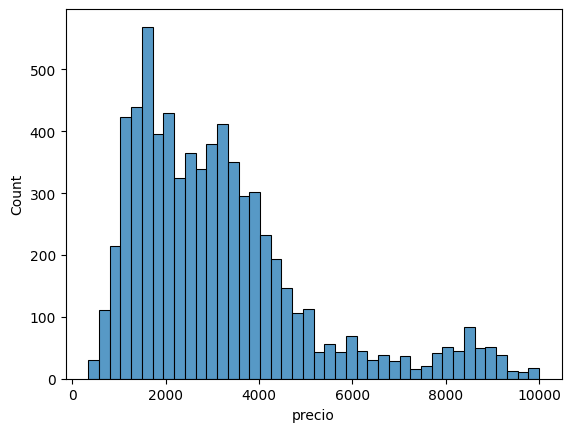

In [37]:
# Crear un histograma usando Seaborn para precio
ax1 = sns.histplot(data = df, x = 'precio')
ax1

<Axes: xlabel='variabilidad', ylabel='Count'>

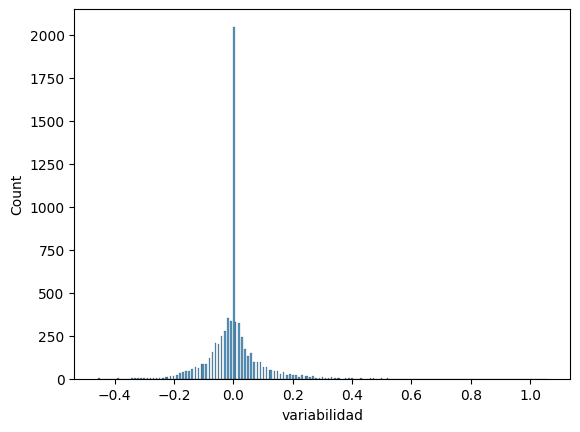

In [38]:
# Crear un histograma usando Seaborn para variabilidad

ax2 = sns.histplot(data = df, x = 'variabilidad')
ax2

<Axes: xlabel='precio'>

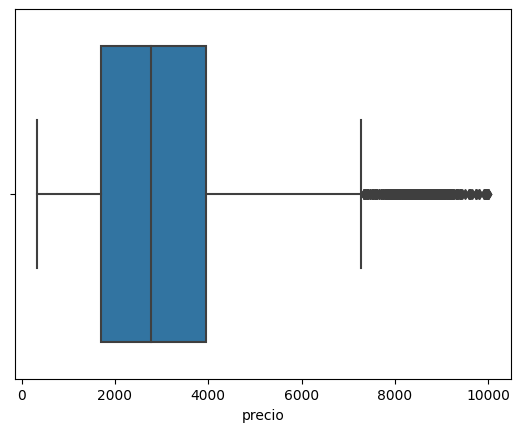

In [39]:
# Crear un boxplot usando Seaborn para precio
ax3 = sns.boxplot(data = df, x = 'precio')
ax3

<Axes: xlabel='variabilidad'>

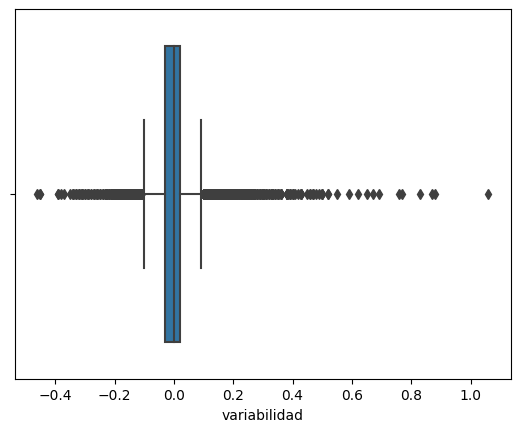

In [40]:
# Crear un boxplot usando Seaborn para variabilidad
ax4 = sns.boxplot(data = df, x = 'variabilidad')
ax4

In [41]:
df[(df['ciudad'] == 'neiva')&(df['producto']=='Pimentón')]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
104,Pimentón,neiva,1762,1.06,01ago2023,2.99336,-75.272362
969,Pimentón,neiva,1071,-0.39,03ago2023,2.99336,-75.272362
1501,Pimentón,neiva,1071,0.00,04ago2023,2.99336,-75.272362
2038,Pimentón,neiva,1214,-0.06,08ago2023,2.99336,-75.272362
2929,Pimentón,neiva,1119,-0.08,10ago2023,2.99336,-75.272362
3461,Pimentón,neiva,1071,-0.04,11ago2023,2.99336,-75.272362
4514,Pimentón,neiva,1095,-0.07,15ago2023,2.99336,-75.272362
5379,Pimentón,neiva,1071,-0.02,17ago2023,2.99336,-75.272362
5911,Pimentón,neiva,1095,0.02,18ago2023,2.99336,-75.272362
6448,Pimentón,neiva,1071,0.00,22ago2023,2.99336,-75.272362


En cuanto a outliers, no parece que hayan datos problemáticos que se deban tratar

# Normalización

No se encuentra la necesidad de normalizar ni estandarizar los datos.

# Filtrado

In [42]:
# 1. ¿Cuáles son los productos que alcanzaron un precio superior a $9.000 en algún momento de agosto en la ciudad de Bogotá y cuál fue su precio máximo?

df9 = df[(df['precio'] > 9000)&(df['ciudad']=='bogotá')]
df9.iloc[: , 0:3]

,producto,ciudad,precio
266,Manzana royal gala,bogotá,9254
685,Manzana royal gala,bogotá,9167
1172,Manzana royal gala,bogotá,9167
1718,Manzana royal gala,bogotá,9254
2213,Manzana royal gala,bogotá,9123
2645,Manzana royal gala,bogotá,9167
3132,Manzana royal gala,bogotá,9079
3678,Manzana royal gala,bogotá,9035
4203,Mango tommy,bogotá,9010
4218,Manzana royal gala,bogotá,9211


In [43]:
df9['producto'].unique()

# 1. Respuesta: La manzana royal gala y el mango tommy alcanzaron u obtuvieron un precio superior a $9.000 en algún momento del mes de agosto en la ciduad de Bogotá

array(['Manzana royal gala', 'Mango tommy'], dtype=object)

In [44]:
max_bog = df9.groupby('producto')['precio'].max()
max_bog

producto
Mango tommy           9010
Manzana royal gala    9397
Name: precio, dtype: int64

In [45]:
# 2. ¿Cuáles son los productos que alcanzaron un precio inferior a $500 en algún momento de agosto en la ciudad de Medellín y cuál fue su precio promedio?

df_Med = df[(df['ciudad']=='medellín') & (df['precio'] <500)]
df_Med.iloc[: , 0:3]

# Respuesta: solo la zanahoria mantuvo u obtuvo precios por debajo de $500 durante el mes de agosto en la ciudad de Medellín

,producto,ciudad,precio
139,Zanahoria,medellín,417
555,Zanahoria,medellín,422
1013,Zanahoria,medellín,369
1547,Zanahoria,medellín,431
2076,Zanahoria,medellín,433
2515,Zanahoria,medellín,383
2973,Zanahoria,medellín,344
3507,Zanahoria,medellín,356
4057,Zanahoria,medellín,444
4549,Zanahoria,medellín,422


In [46]:
df_Med['precio'].mean()

396.57894736842104

In [47]:
# 3. ¿En qué ciudades del país el aguacate alcanzó un precio inferior a $3.500 en algún momento de agosto?

df_agua = df[((df['producto'] == 'Aguacate*')|(df['producto'] == 'Aguacate *'))&(df['precio']<3500)]
df_agua.iloc[: , 0:3]

,producto,ciudad,precio
4065,Aguacate *,armenia,3400
4066,Aguacate *,armenia,3400
4554,Aguacate*,armenia,3400
4555,Aguacate*,armenia,3400
5430,Aguacate *,armenia,3400
5431,Aguacate *,armenia,3400
6491,Aguacate *,armenia,3400
6492,Aguacate *,armenia,3400


In [48]:
df_agua['ciudad'].unique()

# Respuesta: En la ciudad de Armenia el aguacate alcanzó un precio inferior a $3.500 durante algunos días del mes de agosto

array(['armenia'], dtype=object)

In [49]:
# 4. ¿Qué productos obtuvieron la variabilidad de precio más alta durante el mes de agosto y en qué ciudades?

df_altvar = df[df['variabilidad'] > 0.8]
df_altvar.iloc[:,[0,1,3]]

# Respuesta: Los productos que obtuvieron la mayor variabilidad de su precio en el mes de agosto fueron el pimentón (1,06 en Neiva), la cebollacabezona blanca (0.88 en Pereira, 0.83 en Popayán) y la habichuela (0.87 en Cali)

,producto,ciudad,variabilidad
104,Pimentón,neiva,1.06
1948,Cebolla cabezona blanca,pereira,0.88
2399,Cebolla cabezona blanca,popayán,0.83
4474,Habichuela,cali,0.87


In [50]:
# 5. ¿El precio de la papa fue inferior en la ciudad de Pasto (territorio papero) comparado con la ciudad de Cartagena (territorio no papero) durante el mes de agosto?

df_papa = df[((df['producto'] == 'Papa negra*')|(df['producto'] == 'Papa criolla')|(df['producto']=='Papa  criolla'))&((df['ciudad']=='pasto')|(df['ciudad']=='cartagena'))]
df_papa.iloc[:,0:3]

,producto,ciudad,precio
794,Papa criolla,cartagena,4300
797,Papa criolla,pasto,1800
1315,Papa criolla,pasto,1800
1864,Papa criolla,cartagena,4267
2742,Papa negra*,cartagena,1433
2754,Papa criolla,cartagena,4600
2757,Papa criolla,pasto,2500
3275,Papa criolla,pasto,2500
3808,Papa negra*,cartagena,1450
3824,Papa criolla,cartagena,4800


In [51]:
media_precios_por_ciudad = df_papa.groupby('ciudad')['precio'].mean()
media_precios_por_ciudad

# Respuesta: El precio de la papa en Pasto (territorio papero) es inferior comparado con Cartagena (territorio no papero)

ciudad
cartagena    3416.4375
pasto        2000.0000
Name: precio, dtype: float64